In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import xgboost as xgb
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,Name,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Country,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,917,Lassine Sinayoko,1.3,23,0.11,3.68,31.8,0.69,0.97,Mali,...,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3,1.2
1,432,Emil Ceide,0.2,21,0.17,3.49,29.5,0.52,0.00,Norway,...,3.32,6.47,1.75,1.40,6.82,0.87,0.4,NaN,1.0,2.5
2,948,Linton Maina,0.0,24,0.28,2.99,27.5,0.76,0.36,Germany,...,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8,6.0
3,989,Luis Javier Suarez,2.1,25,0.24,2.44,23.5,0.76,0.81,Colombia,...,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0,8.0
4,887,Kim Min-jae,2.9,26,0.05,1.19,80.4,1.06,3.64,NaN,...,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0,60.0


In [4]:
df2 = df.drop(['id','Name','Country'],axis=1)

In [5]:
df2

,Aerial Duels won,Age,Assists,Attacking options created,Attempted Passes,Blocks,Clearances,Expected Goal Contributions,Interceptions,Open Play Goals,...,Progressive Passes,Progressive Carries,Shots,Successful Dribbles,Touches in attacking penalty area,Tackles,Value at beginning of 2020/21 season,Value at beginning of 2021/22 season,Value at beginning of 2022/23 season,Value at beginning of 2023/24 season
0,1.3,23,0.11,3.68,31.8,0.69,0.97,0.16,1.1,0.06,...,4.24,2.81,2.41,1.61,4.36,1.89,0.2,0.8,1.3,1.20
1,0.2,21,0.17,3.49,29.5,0.52,0.00,0.25,0.2,0.00,...,3.32,6.47,1.75,1.40,6.82,0.87,0.4,NaN,1.0,2.50
2,0.0,24,0.28,2.99,27.5,0.76,0.36,0.26,0.2,0.12,...,2.45,3.62,1.41,0.88,3.98,0.72,7.5,2.5,1.8,6.00
3,2.1,25,0.24,2.44,23.5,0.76,0.81,0.14,0.3,0.33,...,1.80,1.66,2.89,1.09,4.08,1.04,10.0,10.0,9.0,8.00
4,2.9,26,0.05,1.19,80.4,1.06,3.64,0.04,1.5,0.05,...,4.81,1.20,0.21,0.14,0.70,1.57,2.0,6.5,9.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,0.5,28,0.26,3.41,59.8,0.73,1.62,0.20,0.5,0.00,...,6.54,1.57,1.20,0.63,2.04,1.15,5.0,4.5,5.5,4.00
1289,0.3,31,0.00,4.01,42.4,0.81,0.29,0.17,0.3,0.07,...,4.33,1.98,2.13,0.29,2.94,1.32,25.0,25.0,25.0,14.00
1290,0.7,24,0.04,2.61,31.0,1.65,0.25,0.14,0.4,0.00,...,4.65,3.42,1.18,2.11,2.28,3.00,3.5,3.3,3.5,3.00
1291,0.4,23,0.03,1.63,61.6,1.18,0.81,0.05,1.2,0.03,...,5.13,1.03,0.40,0.90,0.50,1.43,0.3,2.0,2.5,18.00


In [6]:
(df2.isna().sum()/df2.count()*100).sort_values(ascending=False)

Value at beginning of 2020/21 season    6.070550
Value at beginning of 2021/22 season    2.375297
Value at beginning of 2022/23 season    0.388199
Aerial Duels won                        0.000000
Progressive Passes Rec                  0.000000
Tackles                                 0.000000
Touches in attacking penalty area       0.000000
Successful Dribbles                     0.000000
Shots                                   0.000000
Progressive Carries                     0.000000
Progressive Passes                      0.000000
Percentage of Passes Completed          0.000000
Age                                     0.000000
Open Play Expected Goals                0.000000
Open Play Goals                         0.000000
Interceptions                           0.000000
Expected Goal Contributions             0.000000
Clearances                              0.000000
Blocks                                  0.000000
Attempted Passes                        0.000000
Attacking options cr

In [7]:
val21 = df2["Value at beginning of 2020/21 season"].median()
val22 = df2["Value at beginning of 2021/22 season"].median()
val23 = df2["Value at beginning of 2022/23 season"].median()

In [8]:
df2["Value at beginning of 2020/21 season"].fillna(val21,inplace=True)
df2["Value at beginning of 2021/22 season"].fillna(val22,inplace=True)
df2["Value at beginning of 2022/23 season"].fillna(val23,inplace=True)

<AxesSubplot: >

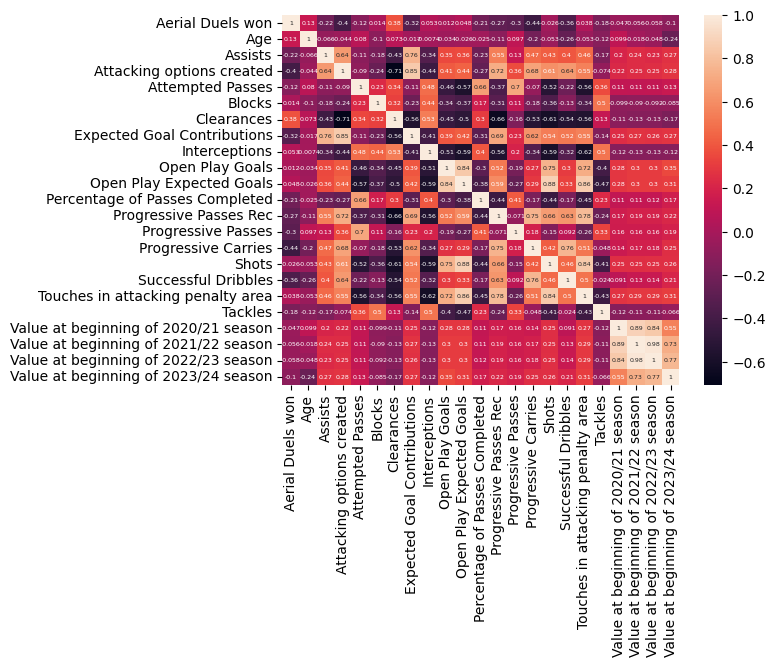

In [9]:
sns.heatmap(df2.corr(),annot=True,annot_kws={'size':4.5})

In [10]:
X = df2[df2.columns[0:22]]
Y = df2[df2.columns[22]]

In [11]:
xgbr = xgb.XGBRegressor()

In [12]:
model3 = make_pipeline(MinMaxScaler(),xgbr)

In [13]:
#XGB
X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.175)
model3.fit(X_train,Y_train)
Ypre3 = model3.predict(X_test)
rmse3 = mse(Y_test,Ypre3,squared=False)

In [20]:
while(rmse3>7.6):
    X_train, X_test, Y_train, Y_test = tts(X,Y,test_size=0.175)
    model3.fit(X_train,Y_train)
    Ypre3 = model3.predict(X_test)
    rmse3 = mse(Y_test,Ypre3,squared=False)

In [21]:
rmse3

7.567950340801816

In [22]:
test = pd.read_csv("test.csv")

In [23]:
test.drop(['Country',],axis=1,inplace=True)

In [24]:
test["label"] = model3.predict(test[test.columns[1:23]])

In [25]:
test[["id","label"]].to_csv("plsgodfuck.csv",index=False)